In [1]:
import numpy as np
from pydbm.nn.simpleautoencoder.repelling_auto_encoder import RepellingAutoEncoder
from pydbm.nn.neural_network import NeuralNetwork as Encoder
from pydbm.nn.neural_network import NeuralNetwork as Decoder
from pydbm.nn.nn_layer import NNLayer as EncoderLayer
from pydbm.nn.nn_layer import NNLayer as DecoderLayer
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.identity_function import IdentityFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam
from pydbm.synapse.nn_graph import NNGraph as EncoderGraph
from pydbm.synapse.nn_graph import NNGraph as DecoderGraph
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation
from pydbm.optimization.batch_norm import BatchNorm

from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [2]:
epochs = 1000
batch_size = 20
dim1 = 500
dim2 = 500
scale = 1e-05

In [3]:
encoder_activation_function = TanhFunction()
#encoder_activation_function.batch_norm = BatchNorm()
decoder_activation_function = IdentityFunction()
#decoder_activation_function.batch_norm = BatchNorm()

In [4]:
encoder_graph = EncoderGraph(
    activation_function=encoder_activation_function,
    hidden_neuron_count=dim1,
    output_neuron_count=dim2,
    scale=scale,
)

encoder_layer = EncoderLayer(encoder_graph)

opt_params = Adam()
opt_params.dropout_rate = 0.5

encoder = Encoder(
    nn_layer_list=[
        encoder_layer, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=10.0),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [5]:
decoder_graph = DecoderGraph(
    activation_function=decoder_activation_function,
    hidden_neuron_count=dim2,
    output_neuron_count=dim1,
    scale=scale,
)

decoder_graph.tied_graph = encoder_graph
decoder_layer = DecoderLayer(decoder_graph)

opt_params = Adam()
opt_params.dropout_rate = 0.5

decoder = Decoder(
    nn_layer_list=[
        decoder_layer, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=10.0),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [6]:
auto_encoder = RepellingAutoEncoder(
    encoder=encoder,
    decoder=decoder,
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-03,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=1e+10),
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [7]:
observed_arr = np.random.normal(loc=0.0, scale=1.0, size=(1000, dim1))
observed_arr = (observed_arr - observed_arr.mean()) / (observed_arr.std())

In [8]:
auto_encoder.learn(observed_arr=observed_arr, target_arr=observed_arr)

NN starts learning.
Best params are updated.
Epoch: 1
Loss: 
Training: 0.9934576388553109 Test: 1.0071954384403075
Epoch: 2
Loss: 
Training: 0.9994829601530708 Test: 1.0158685954255546
Best params are updated.
Epoch: 3
Loss: 
Training: 0.9779421208508631 Test: 0.9677225562106231
Epoch: 4
Loss: 
Training: 1.0009095262378103 Test: 0.996721535744279
Epoch: 5
Loss: 
Training: 0.9922174287607375 Test: 1.0023466697197443
Epoch: 6
Loss: 
Training: 0.9848585085926589 Test: 0.9737456374582666
Best params are updated.
Epoch: 7
Loss: 
Training: 0.9564659248562609 Test: 0.9961415834473444
Epoch: 8
Loss: 
Training: 1.0047913426106074 Test: 0.976327099773864
Epoch: 9
Loss: 
Training: 0.9800796855248581 Test: 1.0206813966205779
Epoch: 10
Loss: 
Training: 1.0039984535123117 Test: 0.9822862750400975
Epoch: 11
Loss: 
Training: 0.9672706831632275 Test: 0.9504423598257296
Rolling mean of Loss (Window is 10): 
Training: 0.9894203589954488 Test: 0.9939036787880658
Epoch: 12
Loss: 
Training: 0.96255875958121

Training: 0.8744888494319172 Test: 0.9354242034541823
Epoch: 56
Loss: 
Training: 0.8828897337645852 Test: 0.932910772371792
Rolling mean of Loss (Window is 10): 
Training: 0.8734210475257521 Test: 0.9331832584967483
Epoch: 57
Loss: 
Training: 0.8916344133426853 Test: 0.935721892799812
Rolling mean of Loss (Window is 10): 
Training: 0.8724231217334998 Test: 0.930252416567523
Epoch: 58
Loss: 
Training: 0.8794108094145133 Test: 0.9285562244312919
Rolling mean of Loss (Window is 10): 
Training: 0.8758013562633584 Test: 0.9310636564857562
Epoch: 59
Loss: 
Training: 0.8695066858670844 Test: 0.9390892130346334
Rolling mean of Loss (Window is 10): 
Training: 0.8763145277450617 Test: 0.9315185928401162
Epoch: 60
Loss: 
Training: 0.870695249101253 Test: 0.945231355959922
Rolling mean of Loss (Window is 10): 
Training: 0.8770180980643199 Test: 0.9316328291266581
Epoch: 61
Loss: 
Training: 0.866397844457256 Test: 0.9458906780854593
Rolling mean of Loss (Window is 10): 
Training: 0.8748341432270982

Epoch: 106
Loss: 
Training: 0.8820675566421771 Test: 0.9110557126295397
Rolling mean of Loss (Window is 10): 
Training: 0.8651731315234443 Test: 0.9360168929202161
Epoch: 107
Loss: 
Training: 0.8467262408902622 Test: 0.9261624187631176
Rolling mean of Loss (Window is 10): 
Training: 0.8671226123307847 Test: 0.9343989475823176
Epoch: 108
Loss: 
Training: 0.8654092191140266 Test: 0.9224070508440695
Rolling mean of Loss (Window is 10): 
Training: 0.8684850699419613 Test: 0.9341182910641755
Epoch: 109
Loss: 
Training: 0.8531690536925326 Test: 0.9319892590796817
Rolling mean of Loss (Window is 10): 
Training: 0.8680026850843359 Test: 0.9333069745896827
Epoch: 110
Loss: 
Training: 0.8830610523011392 Test: 0.9285701840153513
Rolling mean of Loss (Window is 10): 
Training: 0.8686231592333458 Test: 0.9309017006486109
Epoch: 111
Loss: 
Training: 0.8579997917252975 Test: 0.9338739730576592
Rolling mean of Loss (Window is 10): 
Training: 0.8702390116250701 Test: 0.9302654846414218
Epoch: 112
Loss:

Epoch: 156
Loss: 
Training: 0.8693440143239674 Test: 0.9353338056776883
Rolling mean of Loss (Window is 10): 
Training: 0.8533596496554422 Test: 0.9296880516517254
Epoch: 157
Loss: 
Training: 0.8819187865990927 Test: 0.9516553106601743
Rolling mean of Loss (Window is 10): 
Training: 0.8585039627996902 Test: 0.9301157472308029
Epoch: 158
Loss: 
Training: 0.847731835697971 Test: 0.9547895084843936
Rolling mean of Loss (Window is 10): 
Training: 0.8608312015009634 Test: 0.9308499508065091
Epoch: 159
Loss: 
Training: 0.8429772305610964 Test: 0.8942633169706283
Rolling mean of Loss (Window is 10): 
Training: 0.8586381647421641 Test: 0.9315192716107772
Epoch: 160
Loss: 
Training: 0.8669252494196742 Test: 0.9169110425025631
Rolling mean of Loss (Window is 10): 
Training: 0.8579419525745597 Test: 0.9286254370166835
Epoch: 161
Loss: 
Training: 0.8570993900936231 Test: 0.9457453373348557
Rolling mean of Loss (Window is 10): 
Training: 0.8588212862083188 Test: 0.9273963985292497
Epoch: 162
Loss: 

Training: 0.872896924275797 Test: 0.949203991536307
Rolling mean of Loss (Window is 10): 
Training: 0.8591512087242925 Test: 0.9284069379778568
Epoch: 207
Loss: 
Training: 0.8487392644712081 Test: 0.9251825755494014
Rolling mean of Loss (Window is 10): 
Training: 0.8625123649593146 Test: 0.9311625690275646
Epoch: 208
Loss: 
Training: 0.8547566887724887 Test: 0.9362934862248574
Rolling mean of Loss (Window is 10): 
Training: 0.8580711693399516 Test: 0.9302190504472513
Epoch: 209
Loss: 
Training: 0.839953469819062 Test: 0.926190813658831
Rolling mean of Loss (Window is 10): 
Training: 0.8595070876771123 Test: 0.9318724015702964
Epoch: 210
Loss: 
Training: 0.8431547625866226 Test: 0.9175417148428201
Rolling mean of Loss (Window is 10): 
Training: 0.8568312122863816 Test: 0.9305363525820098
Epoch: 211
Loss: 
Training: 0.8321519310379394 Test: 0.9225164404390834
Rolling mean of Loss (Window is 10): 
Training: 0.8560565912895317 Test: 0.9287538577449806
Epoch: 212
Loss: 
Training: 0.86788260

Rolling mean of Loss (Window is 10): 
Training: 0.8539793438709257 Test: 0.9366891267673457
Epoch: 257
Loss: 
Training: 0.8627623050461305 Test: 0.9237919275147795
Rolling mean of Loss (Window is 10): 
Training: 0.8502516244578405 Test: 0.9355258768293965
Epoch: 258
Loss: 
Training: 0.8421377676906486 Test: 0.9283672900125844
Rolling mean of Loss (Window is 10): 
Training: 0.8513294438522786 Test: 0.9360436349682191
Epoch: 259
Loss: 
Training: 0.846850462073601 Test: 0.9259875947272954
Rolling mean of Loss (Window is 10): 
Training: 0.8499594214865567 Test: 0.9338869333632986
Epoch: 260
Loss: 
Training: 0.8746005718155174 Test: 0.9089384031648824
Rolling mean of Loss (Window is 10): 
Training: 0.8502682059410013 Test: 0.9349168855736322
Epoch: 261
Loss: 
Training: 0.8521579598722939 Test: 0.9210504877049208
Rolling mean of Loss (Window is 10): 
Training: 0.8496936836369196 Test: 0.9311687834488428
Epoch: 262
Loss: 
Training: 0.866926556623094 Test: 0.9272915612254014
Rolling mean of Lo

Training: 0.8601930102258901 Test: 0.9362443762338215
Epoch: 307
Loss: 
Training: 0.8926601920603674 Test: 0.9219652513208004
Rolling mean of Loss (Window is 10): 
Training: 0.8603327901991837 Test: 0.9319116124533602
Epoch: 308
Loss: 
Training: 0.8775767788863166 Test: 0.9383129479740131
Rolling mean of Loss (Window is 10): 
Training: 0.8615553262852954 Test: 0.9309799178449492
Epoch: 309
Loss: 
Training: 0.8850224486423717 Test: 0.9154859507596151
Rolling mean of Loss (Window is 10): 
Training: 0.8645833949560542 Test: 0.9315631416197119
Epoch: 310
Loss: 
Training: 0.8858897288508962 Test: 0.9315684452227095
Rolling mean of Loss (Window is 10): 
Training: 0.8660091217760769 Test: 0.9293540264010793
Epoch: 311
Loss: 
Training: 0.8662122288892813 Test: 0.9288738632430337
Rolling mean of Loss (Window is 10): 
Training: 0.8702246228177517 Test: 0.9308968308713093
Epoch: 312
Loss: 
Training: 0.8736551258329542 Test: 0.945135639130121
Rolling mean of Loss (Window is 10): 
Training: 0.87519

Epoch: 357
Loss: 
Training: 0.8527477411588811 Test: 0.9318822833918019
Rolling mean of Loss (Window is 10): 
Training: 0.8518323159587494 Test: 0.9300478940613701
Epoch: 358
Loss: 
Training: 0.8599391285283727 Test: 0.9220449306865419
Rolling mean of Loss (Window is 10): 
Training: 0.8544701891233737 Test: 0.9308867943808945
Epoch: 359
Loss: 
Training: 0.8658648256714992 Test: 0.9324438141519993
Rolling mean of Loss (Window is 10): 
Training: 0.8520218620572819 Test: 0.930063441357499
Epoch: 360
Loss: 
Training: 0.8644623938914264 Test: 0.9181890662690366
Rolling mean of Loss (Window is 10): 
Training: 0.8523773679286201 Test: 0.9315051600222379
Epoch: 361
Loss: 
Training: 0.8613981610374157 Test: 0.9408976350806831
Rolling mean of Loss (Window is 10): 
Training: 0.8560790304978717 Test: 0.9296108335799564
Epoch: 362
Loss: 
Training: 0.8789112578420172 Test: 0.9404875979506739
Rolling mean of Loss (Window is 10): 
Training: 0.8557101058709238 Test: 0.9304962797840812
Epoch: 363
Loss: 

Training: 0.8236232829715827 Test: 0.903833446888873
Rolling mean of Loss (Window is 10): 
Training: 0.8617416176827991 Test: 0.9329167560128114
Epoch: 408
Loss: 
Training: 0.8537711374438183 Test: 0.9672559444786132
Rolling mean of Loss (Window is 10): 
Training: 0.860022554034986 Test: 0.929233650172501
Epoch: 409
Loss: 
Training: 0.8545340044163747 Test: 0.932737032047848
Rolling mean of Loss (Window is 10): 
Training: 0.8580231484906287 Test: 0.9319879619845638
Epoch: 410
Loss: 
Training: 0.8496617871497927 Test: 0.9365084933250224
Rolling mean of Loss (Window is 10): 
Training: 0.8573810533616664 Test: 0.9305950380483387
Epoch: 411
Loss: 
Training: 0.8533307551324019 Test: 0.9309427209925271
Rolling mean of Loss (Window is 10): 
Training: 0.8558397699934854 Test: 0.9324496094055255
Epoch: 412
Loss: 
Training: 0.8570470107488624 Test: 0.9532609954934246
Rolling mean of Loss (Window is 10): 
Training: 0.8558750008985149 Test: 0.9311047582380597
Epoch: 413
Loss: 
Training: 0.83753424

Rolling mean of Loss (Window is 10): 
Training: 0.8449585630890756 Test: 0.9323699850000713
Epoch: 458
Loss: 
Training: 0.8586320655566294 Test: 0.9067937453005201
Rolling mean of Loss (Window is 10): 
Training: 0.8451323322669598 Test: 0.9327021199296841
Epoch: 459
Loss: 
Training: 0.8562615062316722 Test: 0.9299991668054179
Rolling mean of Loss (Window is 10): 
Training: 0.8459106410899103 Test: 0.9307717947362655
Epoch: 460
Loss: 
Training: 0.867355187995549 Test: 0.9138125402036392
Rolling mean of Loss (Window is 10): 
Training: 0.8448228301584692 Test: 0.9289791112878081
Epoch: 461
Loss: 
Training: 0.8668760635529575 Test: 0.9269609175102247
Rolling mean of Loss (Window is 10): 
Training: 0.8463819840516228 Test: 0.9268693982241942
Epoch: 462
Loss: 
Training: 0.8485586133993444 Test: 0.9346472513218596
Rolling mean of Loss (Window is 10): 
Training: 0.8468306522084375 Test: 0.9267463712407519
Epoch: 463
Loss: 
Training: 0.8731423216343274 Test: 0.9465393390184236
Rolling mean of L

Training: 0.8525407880574886 Test: 0.9292541426390665
Epoch: 508
Loss: 
Training: 0.8693002696158106 Test: 0.932728294830017
Rolling mean of Loss (Window is 10): 
Training: 0.85348630730666 Test: 0.9311939549801245
Epoch: 509
Loss: 
Training: 0.8371669945901307 Test: 0.9398345469299291
Rolling mean of Loss (Window is 10): 
Training: 0.8569936329255524 Test: 0.9318400455730727
Epoch: 510
Loss: 
Training: 0.873605181904943 Test: 0.919313239101811
Rolling mean of Loss (Window is 10): 
Training: 0.8535837482321739 Test: 0.9326533112464229
Epoch: 511
Loss: 
Training: 0.8763763924069237 Test: 0.9602415860449959
Rolling mean of Loss (Window is 10): 
Training: 0.8556063040184346 Test: 0.9323249108711252
Epoch: 512
Loss: 
Training: 0.8533023587370042 Test: 0.9271001735160708
Rolling mean of Loss (Window is 10): 
Training: 0.862099284825898 Test: 0.9357197396175121
Epoch: 513
Loss: 
Training: 0.8550170659861264 Test: 0.9291328131633223
Rolling mean of Loss (Window is 10): 
Training: 0.8587590991

Epoch: 558
Loss: 
Training: 0.8566882767506204 Test: 0.927016718399451
Rolling mean of Loss (Window is 10): 
Training: 0.8594212406606376 Test: 0.9290087487747153
Epoch: 559
Loss: 
Training: 0.8815790546875273 Test: 0.9188640251817091
Rolling mean of Loss (Window is 10): 
Training: 0.8594811795547728 Test: 0.9286053034266691
Epoch: 560
Loss: 
Training: 0.8499705000929065 Test: 0.9388445590729867
Rolling mean of Loss (Window is 10): 
Training: 0.8597091949568643 Test: 0.9261242172185146
Epoch: 561
Loss: 
Training: 0.8587927213351518 Test: 0.9328587832389303
Rolling mean of Loss (Window is 10): 
Training: 0.8585004436606857 Test: 0.9293050517525353
Epoch: 562
Loss: 
Training: 0.8453931232319817 Test: 0.9280833791532234
Rolling mean of Loss (Window is 10): 
Training: 0.8603680473720974 Test: 0.9302035044815972
Epoch: 563
Loss: 
Training: 0.8584426763761421 Test: 0.933088833726102
Rolling mean of Loss (Window is 10): 
Training: 0.8613810870234374 Test: 0.9318202746919398
Epoch: 564
Loss: 


Epoch: 608
Loss: 
Training: 0.8467900167637268 Test: 0.9158048038470588
Rolling mean of Loss (Window is 10): 
Training: 0.8569360452174084 Test: 0.9317116245559973
Epoch: 609
Loss: 
Training: 0.8514158336301562 Test: 0.9276152550968867
Rolling mean of Loss (Window is 10): 
Training: 0.8570692461512944 Test: 0.9311907568710215
Epoch: 610
Loss: 
Training: 0.8806909402420758 Test: 0.9304190698025883
Rolling mean of Loss (Window is 10): 
Training: 0.8569522143718666 Test: 0.9316793461776227
Epoch: 611
Loss: 
Training: 0.8564380440249886 Test: 0.9176689811388674
Rolling mean of Loss (Window is 10): 
Training: 0.8594645515740724 Test: 0.9308243409060847
Epoch: 612
Loss: 
Training: 0.8596154594356034 Test: 0.9043537875280655
Rolling mean of Loss (Window is 10): 
Training: 0.8558211801058964 Test: 0.9314273849871842
Epoch: 613
Loss: 
Training: 0.8781458954370659 Test: 0.9172444221891667
Rolling mean of Loss (Window is 10): 
Training: 0.8562591121216212 Test: 0.9284752954609296
Epoch: 614
Loss:

Training: 0.8431456903922504 Test: 0.9399922197112037
Rolling mean of Loss (Window is 10): 
Training: 0.8534225942933276 Test: 0.9332763697860035
Epoch: 659
Loss: 
Training: 0.8694878120501469 Test: 0.9335912767770508
Rolling mean of Loss (Window is 10): 
Training: 0.852333446270577 Test: 0.9346034808260916
Epoch: 660
Loss: 
Training: 0.8664182619094952 Test: 0.9543533567978609
Rolling mean of Loss (Window is 10): 
Training: 0.8528521198983107 Test: 0.9342828227633968
Epoch: 661
Loss: 
Training: 0.8312048465604537 Test: 0.9218496002800209
Rolling mean of Loss (Window is 10): 
Training: 0.8534164679408163 Test: 0.9380636499552105
Epoch: 662
Loss: 
Training: 0.8587541740040424 Test: 0.9102758032216504
Rolling mean of Loss (Window is 10): 
Training: 0.8509665152475859 Test: 0.9373964818850725
Epoch: 663
Loss: 
Training: 0.8583447792217886 Test: 0.9277349709856367
Rolling mean of Loss (Window is 10): 
Training: 0.8507741298839221 Test: 0.9337259244719819
Epoch: 664
Loss: 
Training: 0.83429

Rolling mean of Loss (Window is 10): 
Training: 0.8518211301850147 Test: 0.9273484302111822
Epoch: 709
Loss: 
Training: 0.8667359511674074 Test: 0.9162602163169138
Rolling mean of Loss (Window is 10): 
Training: 0.8516958348946408 Test: 0.9292804797243592
Epoch: 710
Loss: 
Training: 0.8595510396801863 Test: 0.9460274797919465
Rolling mean of Loss (Window is 10): 
Training: 0.8520596546574868 Test: 0.9293825013226696
Epoch: 711
Loss: 
Training: 0.8944561585508621 Test: 0.938175661864546
Rolling mean of Loss (Window is 10): 
Training: 0.8539906113951282 Test: 0.9322132847711092
Epoch: 712
Loss: 
Training: 0.8333598361779679 Test: 0.9301300192814884
Rolling mean of Loss (Window is 10): 
Training: 0.8561735088241111 Test: 0.9315036405006563
Epoch: 713
Loss: 
Training: 0.81048964489044 Test: 0.902675548293407
Rolling mean of Loss (Window is 10): 
Training: 0.8542236397695262 Test: 0.9296821266687172
Epoch: 714
Loss: 
Training: 0.8458636923629725 Test: 0.926609604787658
Rolling mean of Loss 

Training: 0.865189554053744 Test: 0.9373421609950421
Epoch: 759
Loss: 
Training: 0.8122987114891099 Test: 0.9007465386820895
Rolling mean of Loss (Window is 10): 
Training: 0.863539842459919 Test: 0.9363817806085747
Epoch: 760
Loss: 
Training: 0.8279445959332509 Test: 0.9282203081613383
Rolling mean of Loss (Window is 10): 
Training: 0.8567318843248767 Test: 0.9344918338777362
Epoch: 761
Loss: 
Training: 0.8474224094630312 Test: 0.9452611858153152
Rolling mean of Loss (Window is 10): 
Training: 0.8521490115824806 Test: 0.93360894030975
Epoch: 762
Loss: 
Training: 0.8516069669743076 Test: 0.9363032604253915
Rolling mean of Loss (Window is 10): 
Training: 0.8488785267042328 Test: 0.9342776202938874
Epoch: 763
Loss: 
Training: 0.8537967041923639 Test: 0.9445006183671265
Rolling mean of Loss (Window is 10): 
Training: 0.8480201564945151 Test: 0.9330646985908508
Epoch: 764
Loss: 
Training: 0.8575447751119886 Test: 0.9185627097150635
Rolling mean of Loss (Window is 10): 
Training: 0.84839037

Epoch: 809
Loss: 
Training: 0.8587719143306058 Test: 0.9351518477172238
Rolling mean of Loss (Window is 10): 
Training: 0.8485685784018953 Test: 0.9254329228100747
Epoch: 810
Loss: 
Training: 0.8768123828838099 Test: 0.9236284821465782
Rolling mean of Loss (Window is 10): 
Training: 0.8473206084780566 Test: 0.925831077687359
Epoch: 811
Loss: 
Training: 0.8662203704627678 Test: 0.9366889476652721
Rolling mean of Loss (Window is 10): 
Training: 0.8503551847750355 Test: 0.92482957954925
Epoch: 812
Loss: 
Training: 0.8847868637962236 Test: 0.9327304739258235
Rolling mean of Loss (Window is 10): 
Training: 0.8537838095986396 Test: 0.9266915981947393
Epoch: 813
Loss: 
Training: 0.8195741408718814 Test: 0.9245809813291913
Rolling mean of Loss (Window is 10): 
Training: 0.8571418667572231 Test: 0.9283238202623487
Epoch: 814
Loss: 
Training: 0.8659145112865273 Test: 0.9238265375888768
Rolling mean of Loss (Window is 10): 
Training: 0.8535787864709189 Test: 0.9270818316488662
Epoch: 815
Loss: 
T

Training: 0.8686054738781013 Test: 0.9380941753289564
Rolling mean of Loss (Window is 10): 
Training: 0.8507430808805972 Test: 0.926582422488465
Epoch: 860
Loss: 
Training: 0.8786255462007699 Test: 0.9177224671585346
Rolling mean of Loss (Window is 10): 
Training: 0.8526175412072117 Test: 0.9310651564834063
Epoch: 861
Loss: 
Training: 0.8953019194535969 Test: 0.9208420775067859
Rolling mean of Loss (Window is 10): 
Training: 0.8557629415349302 Test: 0.92901398210039
Epoch: 862
Loss: 
Training: 0.8586085962290155 Test: 0.9344710208749635
Rolling mean of Loss (Window is 10): 
Training: 0.8595052434826801 Test: 0.9278371747548974
Epoch: 863
Loss: 
Training: 0.8375490902315523 Test: 0.9154260253988529
Rolling mean of Loss (Window is 10): 
Training: 0.8596747225045887 Test: 0.9269097424838426
Epoch: 864
Loss: 
Training: 0.8472650693839662 Test: 0.9223338879421388
Rolling mean of Loss (Window is 10): 
Training: 0.8585019035860488 Test: 0.9269668759245816
Epoch: 865
Loss: 
Training: 0.8649841

Rolling mean of Loss (Window is 10): 
Training: 0.8473814914468347 Test: 0.9270507758261186
Epoch: 910
Loss: 
Training: 0.8439227912394311 Test: 0.9347936629440732
Rolling mean of Loss (Window is 10): 
Training: 0.8466475899437574 Test: 0.9232237984616718
Epoch: 911
Loss: 
Training: 0.8793909536307688 Test: 0.9275395756275518
Rolling mean of Loss (Window is 10): 
Training: 0.8451566696425896 Test: 0.9257587008544921
Epoch: 912
Loss: 
Training: 0.8480311565161553 Test: 0.9340843601182863
Rolling mean of Loss (Window is 10): 
Training: 0.850080422460992 Test: 0.9277212252147781
Epoch: 913
Loss: 
Training: 0.8395544781408771 Test: 0.9357531982291266
Rolling mean of Loss (Window is 10): 
Training: 0.8496180313480789 Test: 0.9279452999375826
Epoch: 914
Loss: 
Training: 0.8506339681795522 Test: 0.930169187437762
Rolling mean of Loss (Window is 10): 
Training: 0.8488826012875605 Test: 0.9292945804055133
Epoch: 915
Loss: 
Training: 0.8452307769465688 Test: 0.9540296791724407
Rolling mean of Lo

Training: 0.8565335038662651 Test: 0.9458606661244303
Epoch: 960
Loss: 
Training: 0.839326021421889 Test: 0.9301836059769822
Rolling mean of Loss (Window is 10): 
Training: 0.8568112087819157 Test: 0.9432515346949633
Epoch: 961
Loss: 
Training: 0.8785099258174425 Test: 0.9211855269794829
Rolling mean of Loss (Window is 10): 
Training: 0.8552371761961431 Test: 0.9417527595511513
Epoch: 962
Loss: 
Training: 0.8863776659939362 Test: 0.9244571934447122
Rolling mean of Loss (Window is 10): 
Training: 0.861107957676284 Test: 0.940407034824214
Epoch: 963
Loss: 
Training: 0.8454327114900841 Test: 0.9339816091161243
Rolling mean of Loss (Window is 10): 
Training: 0.8685645402336422 Test: 0.9358605379965862
Epoch: 964
Loss: 
Training: 0.8333557570999004 Test: 0.9701457788666336
Rolling mean of Loss (Window is 10): 
Training: 0.8655039612687592 Test: 0.9359751046975276
Epoch: 965
Loss: 
Training: 0.8415907184513323 Test: 0.9202973894982839
Rolling mean of Loss (Window is 10): 
Training: 0.8617437

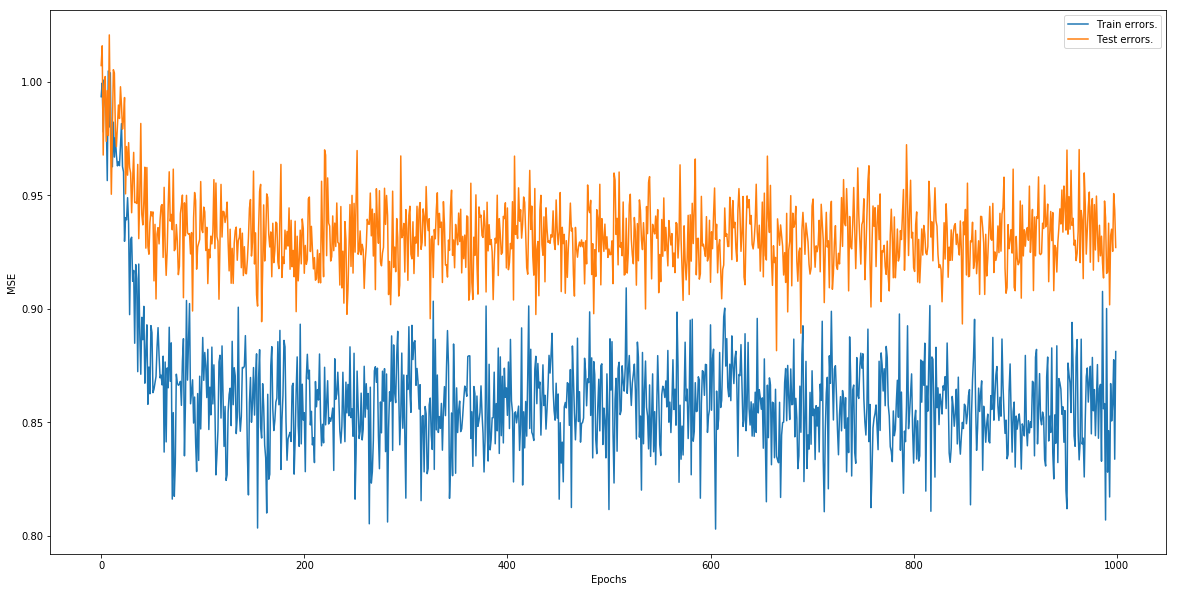

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(auto_encoder.verificatable_result.logs_df.train_loss.values, label="Train errors.")
plt.plot(auto_encoder.verificatable_result.logs_df.test_loss.values, label="Test errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()